<a href="https://colab.research.google.com/github/alex-kondr/Data_Science_HW_9/blob/main/HW_09.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [96]:
import pprint

import pandas as pd
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

from keras.datasets import fashion_mnist
from keras.layers import Flatten, Dense, Dropout
from keras.models import Sequential

In [31]:
(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()

In [39]:
X_valid, X_train = X_train[:5000] / 255.0, X_train[5000:] / 255.0
y_valid, y_train = y_train[:5000], y_train[5000:]

X_train = X_train.reshape(-1, 784)
X_test = X_test.reshape(-1, 784)
X_valid = X_valid.reshape(-1, 784)

In [84]:
result = []

In [122]:
dense_size = 256
model = Sequential()
model.add(Dense(dense_size, activation='relu', input_shape=[784,]))
model.add(Dropout(0,2))
model.add(Dense(dense_size, activation='relu'))
model.add(Dropout(0,2))
model.add(Dense(10, activation='softmax'))

In [123]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [124]:
epochs = 50
batch_size = 32
history = model.fit(
    X_train,
    y_train,
    epochs=epochs,
    batch_size=batch_size,
    validation_data=(X_valid, y_valid)
)

Epoch 1/50
1563/1563 [==============================] - 7s 4ms/step - loss: 0.7876 - accuracy: 0.7098 - val_loss: 0.5898 - val_accuracy: 0.7794
Epoch 2/50
1563/1563 [==============================] - 7s 4ms/step - loss: 0.5248 - accuracy: 0.8096 - val_loss: 0.5100 - val_accuracy: 0.8184
Epoch 3/50
1563/1563 [==============================] - 6s 4ms/step - loss: 0.4651 - accuracy: 0.8334 - val_loss: 0.4594 - val_accuracy: 0.8302
Epoch 4/50
1563/1563 [==============================] - 7s 4ms/step - loss: 0.4316 - accuracy: 0.8433 - val_loss: 0.4396 - val_accuracy: 0.8390
Epoch 5/50
1563/1563 [==============================] - 6s 4ms/step - loss: 0.4067 - accuracy: 0.8527 - val_loss: 0.4213 - val_accuracy: 0.8426
Epoch 6/50
1563/1563 [==============================] - 7s 4ms/step - loss: 0.3887 - accuracy: 0.8590 - val_loss: 0.4183 - val_accuracy: 0.8432
Epoch 7/50
1563/1563 [==============================] - 6s 4ms/step - loss: 0.3725 - accuracy: 0.8646 - val_loss: 0.4141 - val_accuracy:

In [125]:
result.append({
    "Desne_size": dense_size,
    "Epoch_size": epochs,
    "Batch size": batch_size,
    "Accuracy": history.history["accuracy"][-1],
    "Validate accuracy": history.history["val_accuracy"][-1]
})

In [126]:
pprint.pprint(result)

[{'Accuracy': 0.8059399724006653,
  'Batch size': 128,
  'Desne_size': 32,
  'Epoch_size': 10,
  'Validate accuracy': 0.7986000180244446},
 {'Accuracy': 0.8668599724769592,
  'Batch size': 128,
  'Desne_size': 32,
  'Epoch_size': 50,
  'Validate accuracy': 0.8532000184059143},
 {'Accuracy': 0.8561800122261047,
  'Batch size': 256,
  'Desne_size': 32,
  'Epoch_size': 50,
  'Validate accuracy': 0.8406000137329102},
 {'Accuracy': 0.9412999749183655,
  'Batch size': 64,
  'Desne_size': 64,
  'Epoch_size': 200,
  'Validate accuracy': 0.878000020980835},
 {'Accuracy': 0.9433000087738037,
  'Batch size': 32,
  'Desne_size': 256,
  'Epoch_size': 50,
  'Validate accuracy': 0.8921999931335449}]


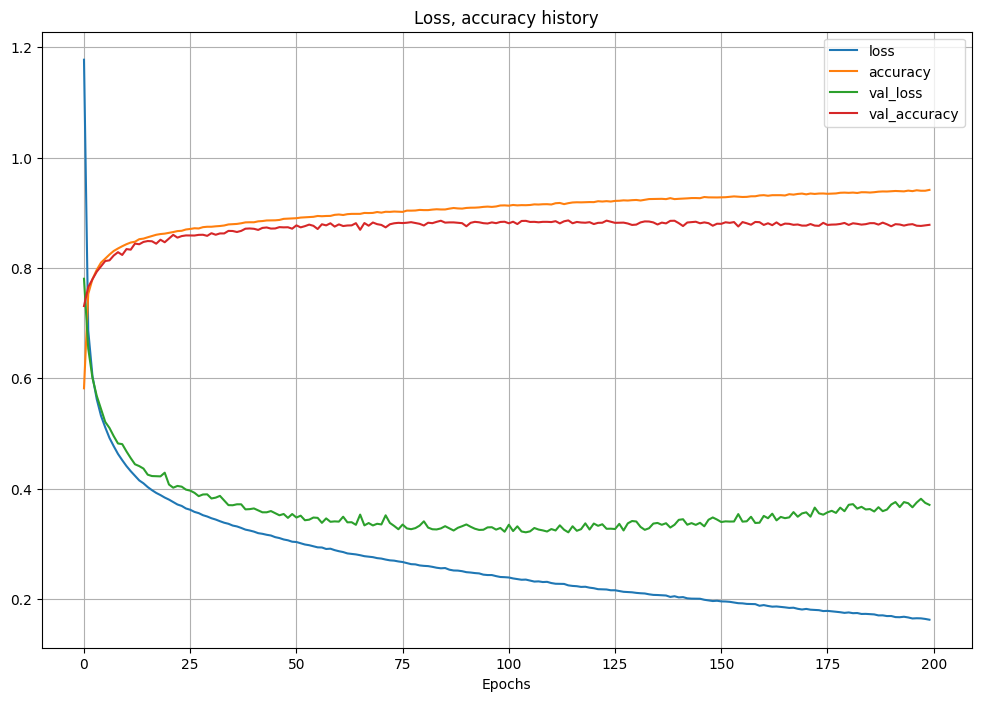

In [121]:
pd.DataFrame(history.history).plot(figsize=(12, 8))
plt.title("Loss, accuracy history")
plt.xlabel("Epochs")
plt.grid(True)
plt.show()

313/313 [==============================] - 0s 1ms/step


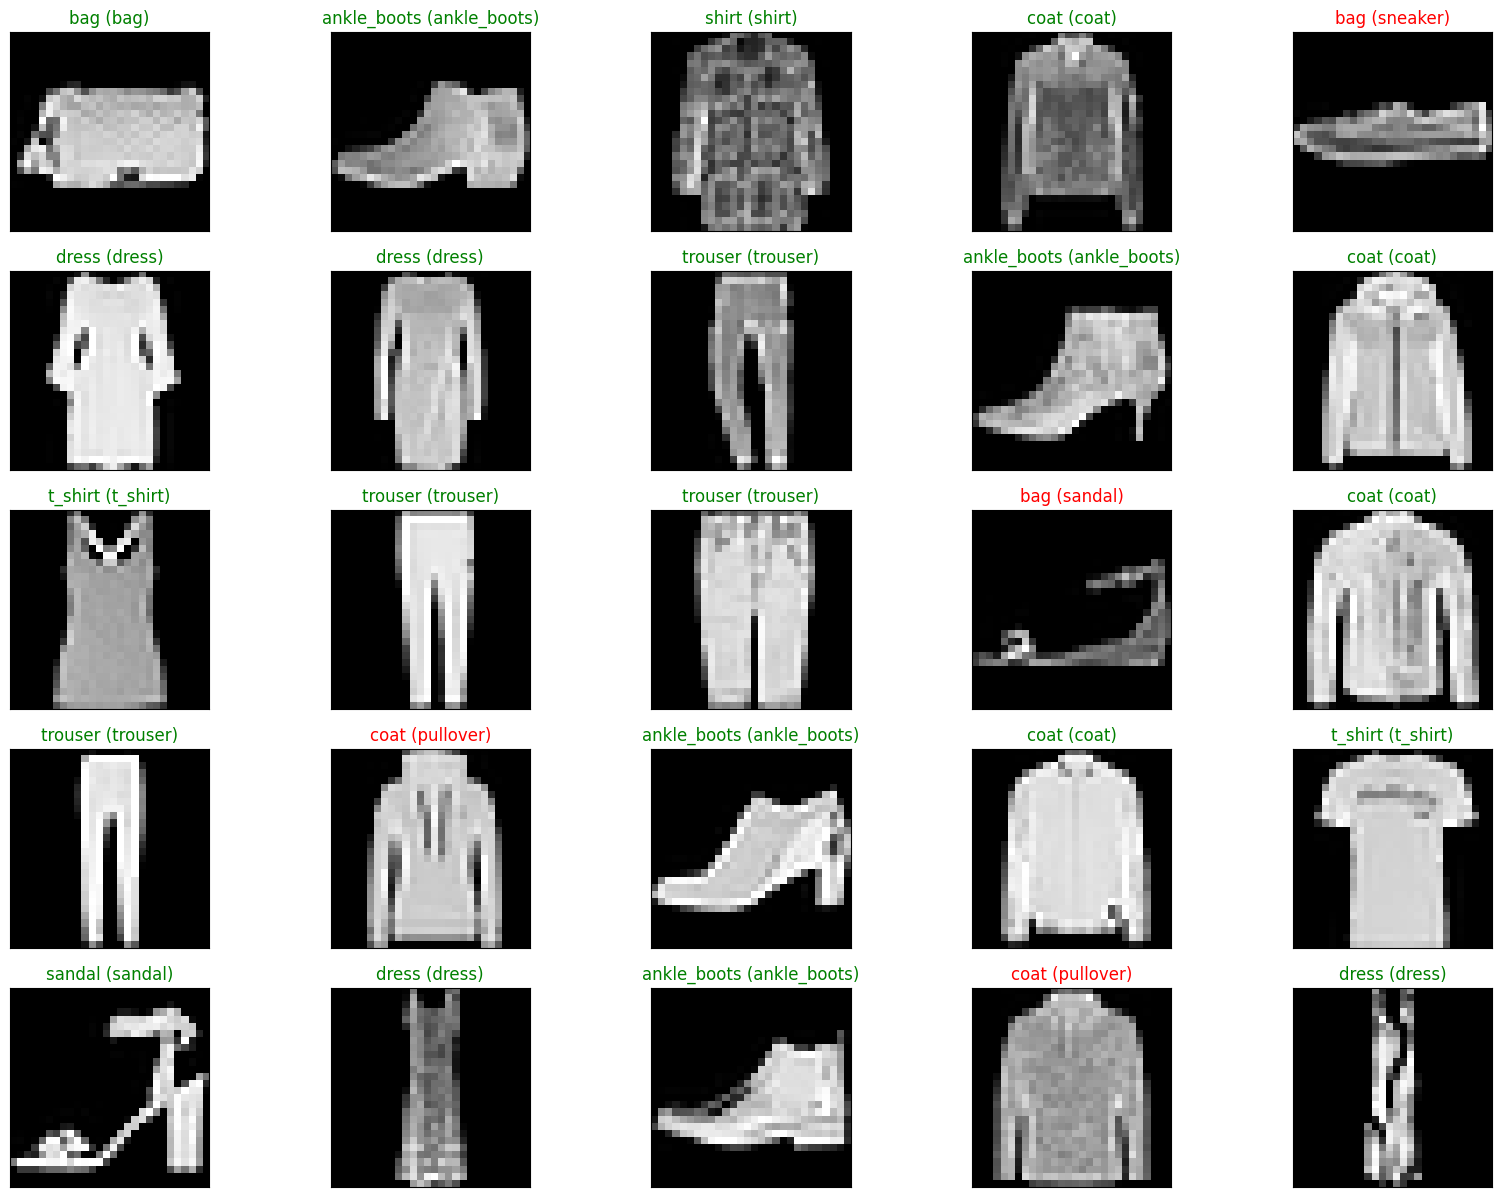

In [119]:
fashion_mnist_labels = ['t_shirt', 'trouser', 'pullover', 'dress', 'coat',
          'sandal', 'shirt', 'sneaker', 'bag', 'ankle_boots']
y_hat = model.predict(X_test)
X_test_ = X_test.reshape(10000, 28, 28)

incorrect = 0
size = 25
figure = plt.figure(figsize=(20, 15))
for i, index in enumerate(np.random.choice(X_test_.shape[0], size=size, replace=False)):
    ax = figure.add_subplot(int(size / 5), 5, i + 1, xticks=[], yticks=[])
    ax.imshow(np.squeeze(X_test_[index]), cmap='gray')
    predict_index = np.argmax(y_hat[index])
    true_index = y_test[index]

    if predict_index != true_index:
      incorrect += 1

    ax.set_title(f"{fashion_mnist_labels[predict_index]} ({fashion_mnist_labels[true_index]})",
                                  color=("green" if predict_index == true_index else "red"))

In [120]:
print(f"incorrect - {incorrect} in {size}")

incorrect - 4 in 25


Найбільше на результат навчання впливає кількість епох. Більше 50 епох дає непогані результати. Зі збільшенням кількості епох коефіцієнт навчання можна збільшити, але на валідаційній вибірці коефіцієт майже не змінюється.